In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
colors = sns.color_palette()

import os
os.getcwd()

%cd /g/data/p66/ars599/work_rp2

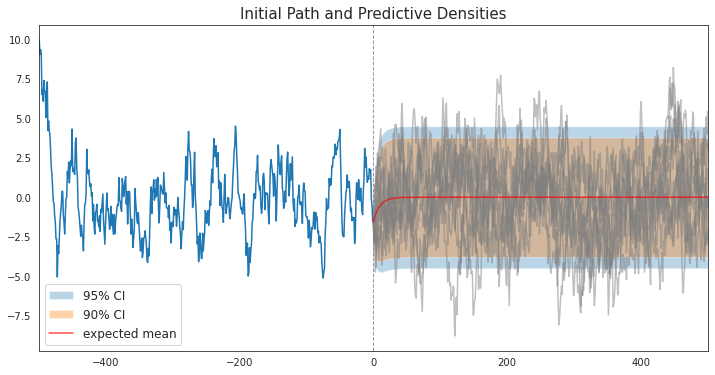

In [18]:
def AR1_simulate(rho, sigma, y0, T):

    # Allocate space and draw epsilons
    y = np.empty(T)
    eps = np.random.normal(0, sigma, T)

    # Initial condition and step forward
    y[0] = y0
    for t in range(1, T):
        y[t] = rho * y[t-1] + eps[t]
        
    return y


def plot_initial_path(initial_path):
    """
    Plot the initial path and the preceding predictive densities
    """
    # Compute .9 confidence interval]
    y0 = initial_path[-1]
    center = np.array([rho**j * y0 for j in range(T1)])
    vars = np.array([sigma**2 * (1 - rho**(2 * j)) / (1 - rho**2) for j in range(T1)])
    y_bounds1_c95, y_bounds2_c95 = center + 1.96 * np.sqrt(vars), center - 1.96 * np.sqrt(vars)
    y_bounds1_c90, y_bounds2_c90 = center + 1.65 * np.sqrt(vars), center - 1.65 * np.sqrt(vars)

    # Plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.set_title("Initial Path and Predictive Densities", fontsize=15)
    ax.plot(np.arange(-T0 + 1, 1), initial_path)
    ax.set_xlim([-T0, T1])
    ax.axvline(0, linestyle='--', alpha=.4, color='k', lw=1)

    # Simulate future paths
    for i in range(10):
        y_future = AR1_simulate(rho, sigma, y0, T1)
        ax.plot(np.arange(T1), y_future, color='grey', alpha=.5)
    
    # Plot 90% CI
    ax.fill_between(np.arange(T1), y_bounds1_c95, y_bounds2_c95, alpha=.3, label='95% CI')
    ax.fill_between(np.arange(T1), y_bounds1_c90, y_bounds2_c90, alpha=.35, label='90% CI')
    ax.plot(np.arange(T1), center, color='red', alpha=.7, label='expected mean')
    ax.legend(fontsize=12)
    plt.show()


sigma =  1
rho = 0.9
T0, T1 = 500, 500
y0 = 10

# Simulate
np.random.seed(145)
initial_path = AR1_simulate(rho, sigma, y0, T0)

# Plot
plot_initial_path(initial_path)

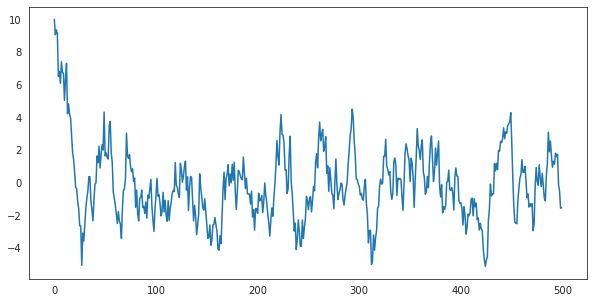

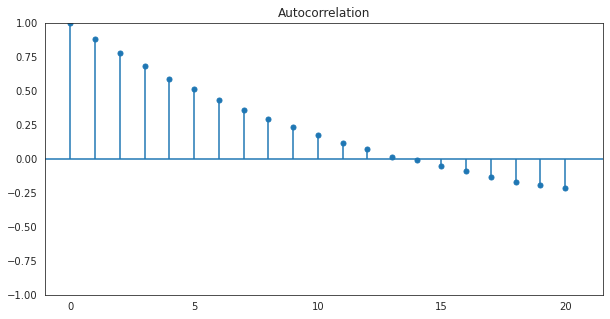

In [20]:
# Plot the TS from previous session
plt.plot(initial_path)
# Autocorrelation
plot_acf(initial_path, alpha=1, lags=20);


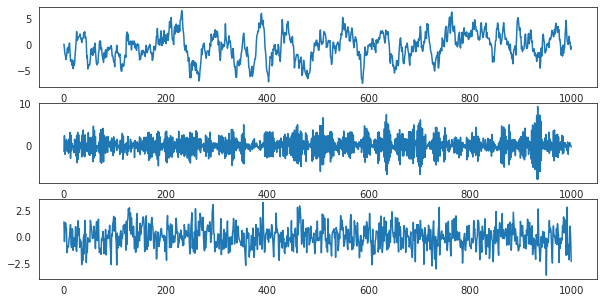

In [16]:
'''
https://goodboychan.github.io/python/datacamp/time_series_analysis/2020/06/08/01-Autoregressive-Models.html
'''
from statsmodels.tsa.arima_process import ArmaProcess

plt.rcParams['figure.figsize'] = (10, 5)

# Plot 1: AR parameter = +0.9
plt.subplot(3, 1, 1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1);

# Plot 2: AR parameter = -0.9
plt.subplot(3, 1, 2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2);

# AR parameter = +0.3
plt.subplot(3, 1, 3)
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3);


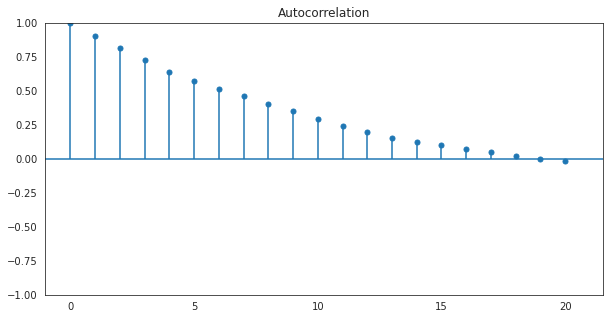

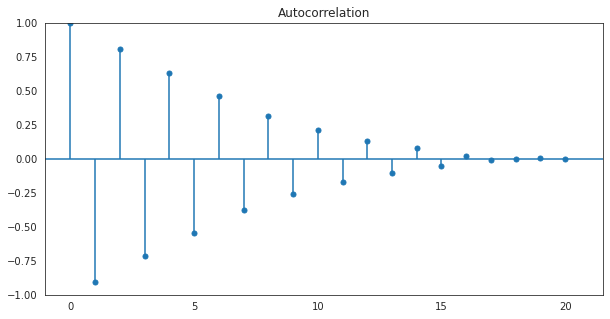

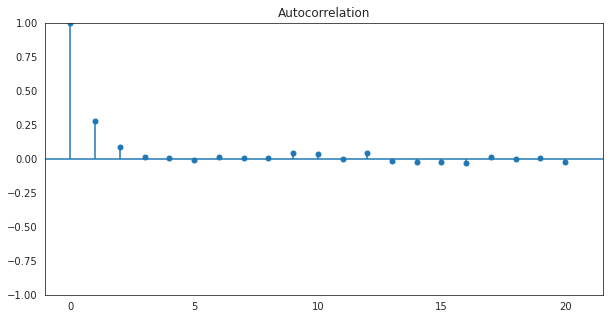

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

plt.rcParams['figure.figsize'] = (10, 5)

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20);

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20);

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20);